In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# need to pull this into an api file
publisherid=10000027998

This query is the framework to get the Review data and the key to search for demographics below

In [2]:
# Creating our blank dataframe

review_df=pd.DataFrame(columns=["Name","BizID","City","State","Zip","ReviewID","Rating"])
review_df

,Name,BizID,City,State,Zip,ReviewID,Rating


In [3]:
# Creating our city list
cities = ["Lockhart, TX", "Memphis, TN","Kansas City, MO","Lexington, NC", "Austin, TX", "St. Louis, MO"
          , "Dallas, TX", "Nashville, TN","Atlanta, GA", "Brooklyn, NY"]


#reviews_df = reviews_df[reviews_df['City'].isin(["Lockhart", "Memphis","Kansas City","Lexington", "Austin", "St. Louis", "Dallas", "Nashville","Atlanta", "Brooklyn"] )]

# setting parameters for looping through two different counts

x=50
y=0
y1=49


In [4]:
for i in range (0,2):
    
 # NEED TO RESET THE RANGE FOR i ABOVE TO GET MORE RESULTS, LIMITING FOR DEVELOPMENT NOW

    for city in cities:
        print(city)
        query_url = f'https://api.citygridmedia.com/content/reviews/v2/search/where?what=barbeque&where={city}&publisher={publisherid}&format=json&rpp=50&i={i}'
        response = requests.get(query_url).json()
        index=0
        for i,index in zip(range(x),range(y,y1)):
            try:
                review_df.loc[index,"Name"] = response['results']['reviews'][i]['business_name']
                review_df.loc[index,"ReviewID"] =response['results']['reviews'][i]['review_id']
                review_df.loc[index,"Rating"] = response['results']['reviews'][i]['review_rating']
                review_df.loc[index,"BizID"] = response['results']['reviews'][i]['listing_id']
                print(f'{index}')
            except (KeyError,IndexError):
                print("Missing field/result... skipping.")
        y=y+50
        y1=y1+50


Lockhart, TX
0
1
2
3
4
5
6
7
8
9
10
11
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing f

800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
Nashville, TN
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
Atlanta, GA
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
Brooklyn, NY
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998


In [5]:
review_df

,Name,BizID,City,State,Zip,ReviewID,Rating
0,Chisholm Trail Bar-B-Q,10192811,NaN,NaN,NaN,ip_10302946967,8
1,Chisholm Trail Bar-B-Q,10192811,NaN,NaN,NaN,ip_9355790545,10
2,Chisholm Trail Bar-B-Q,10192811,NaN,NaN,NaN,ip_10313848476,10
3,Kreuz Market,10192699,NaN,NaN,NaN,gayot_91032be1f6c1a46f4c64a8443c4ff150,None
4,Black's Barbecue,10192700,NaN,NaN,NaN,mism_153833,8
...,...,...,...,...,...,...,...
994,Atomic Wings,682573300,NaN,NaN,NaN,judy_619072771,10
995,Atomic Wings,682573300,NaN,NaN,NaN,judy_662466623,10
996,Atomic Wings,682573300,NaN,NaN,NaN,judy_736796542,10
997,Atomic Wings,682573300,NaN,NaN,NaN,judy_764174782,10


In [6]:
# Uncomment to see a clean print of the json in the reviews response above
# print(json.dumps(response, indent=4, sort_keys=True))

This query is the framework to pass the business listing id from the review data to the places detail API to get the city, state, and zip

In [7]:
for index, row in review_df.iterrows():
    ListingID=row["BizID"]
    places_url = f'http://api.citygridmedia.com/content/places/v2/detail?id={ListingID}&id_type=cs&client_ip=123.4.56.78&publisher={publisherid}&format=json'
    places_response = requests.get(places_url).json()
    
    try:
        review_df.loc[index,"City"] = places_response['locations'][0]['address']['city']
        review_df.loc[index,"State"]=places_response['locations'][0]['address']['state']
        review_df.loc[index,"Zip"]=places_response['locations'][0]['address']['postal_code']
        print(f'{index}')
    except (KeyError):
        print("Missing field/result... skipping.")
# print(f'business name: {BizName}  biz ID: {ListingID} \nCity: {BizCity}  State: {BizSt}  Zip: {BizZip}\nReviewID: {ReviewID}  Rating: {ReviewRating}'    )
# review_df

0
1
2
3
4
5
6
7
8
9
10
11
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
100
101
102
103
104
105
106
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
250
251
252
253
254
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344

In [8]:
review_df

,Name,BizID,City,State,Zip,ReviewID,Rating
0,Chisholm Trail Bar-B-Q,10192811,Lockhart,TX,78644,ip_10302946967,8
1,Chisholm Trail Bar-B-Q,10192811,Lockhart,TX,78644,ip_9355790545,10
2,Chisholm Trail Bar-B-Q,10192811,Lockhart,TX,78644,ip_10313848476,10
3,Kreuz Market,10192699,Lockhart,TX,78644,gayot_91032be1f6c1a46f4c64a8443c4ff150,None
4,Black's Barbecue,10192700,Lockhart,TX,78644,mism_153833,8
...,...,...,...,...,...,...,...
994,Atomic Wings,682573300,Brooklyn,NY,11201,judy_619072771,10
995,Atomic Wings,682573300,Brooklyn,NY,11201,judy_662466623,10
996,Atomic Wings,682573300,Brooklyn,NY,11201,judy_736796542,10
997,Atomic Wings,682573300,Brooklyn,NY,11201,judy_764174782,10


In [9]:
#dropping any data that has NaN
# code from this dataframe
#review_df=review_df.dropna()
#review_df
reviews_df=review_df.dropna()
reviews_df = reviews_df[reviews_df['City'].isin(["Lockhart", "Memphis","Kansas City","Lexington", "Austin", "St. Louis"
          , "Dallas", "Nashville","Atlanta", "Brooklyn"] )]
reviews_df

,Name,BizID,City,State,Zip,ReviewID,Rating
0,Chisholm Trail Bar-B-Q,10192811,Lockhart,TX,78644,ip_10302946967,8
1,Chisholm Trail Bar-B-Q,10192811,Lockhart,TX,78644,ip_9355790545,10
2,Chisholm Trail Bar-B-Q,10192811,Lockhart,TX,78644,ip_10313848476,10
4,Black's Barbecue,10192700,Lockhart,TX,78644,mism_153833,8
6,Kreuz Market,10192699,Lockhart,TX,78644,ip_10303211111,8
...,...,...,...,...,...,...,...
994,Atomic Wings,682573300,Brooklyn,NY,11201,judy_619072771,10
995,Atomic Wings,682573300,Brooklyn,NY,11201,judy_662466623,10
996,Atomic Wings,682573300,Brooklyn,NY,11201,judy_736796542,10
997,Atomic Wings,682573300,Brooklyn,NY,11201,judy_764174782,10


In [10]:
reviews_df.dtypes


Name        object
BizID       object
City        object
State       object
Zip         object
ReviewID    object
Rating      object
dtype: object

In [11]:
reviews_df["Rating"] = reviews_df.Rating.astype(float)

In [12]:
# Uncomment to see a clean print of the json in the places detail response above
#print(json.dumps(places_response, indent=4, sort_keys=True))

In [13]:
#What 10 major cities have the best average overall Ranking for BBQ-Andrea
city_mean = reviews_df.groupby("City")["Rating"].mean()
city_mean.head(10)
#city_mean.describe()

City
Atlanta        6.444444
Austin         7.688889
Brooklyn       9.875000
Dallas         8.045455
Kansas City    8.355556
Lexington      8.551724
Lockhart       8.250000
Memphis        8.176471
Nashville      6.588235
St. Louis      8.000000
Name: Rating, dtype: float64

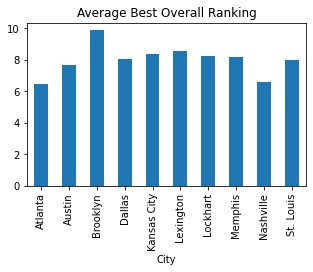

<Figure size 432x288 with 0 Axes>

In [14]:
#MatPlotLib on What 10 major cities have the best overall Ranking for BBQ-Andrea
# Use DataFrame.plot() in order to create a bar chart of the data
city_mean.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Average Best Overall Ranking")

plt.show()
plt.tight_layout()

Brooklyn has the highest average overall ranking. As a collective group the mean is 7.99. 

In [15]:
#City reviews by count-Andrea
#city_count =(review_df.groupby("City")["Rating"]).value_counts()
city_count =reviews_df["City"].value_counts()
city_count.head

<bound method NDFrame.head of Brooklyn       96
Kansas City    90
Austin         90
Atlanta        90
Dallas         88
Memphis        68
Lexington      58
Nashville      34
Lockhart       16
St. Louis       2
Name: City, dtype: int64>

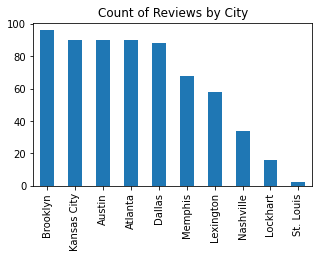

<Figure size 432x288 with 0 Axes>

In [16]:
##MatplotLib reviews by count -Andrea
city_count.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Count of Reviews by City")

plt.show()
plt.tight_layout()

St. Louis only has two reviews but is still in range for the average. 

In [17]:
#City with max review rating-Andrea
city_max = reviews_df.groupby("City")["Rating"].max()
city_max.head(10)

City
Atlanta        10.0
Austin         10.0
Brooklyn       10.0
Dallas         10.0
Kansas City    10.0
Lexington      10.0
Lockhart       10.0
Memphis        10.0
Nashville      10.0
St. Louis       8.0
Name: Rating, dtype: float64

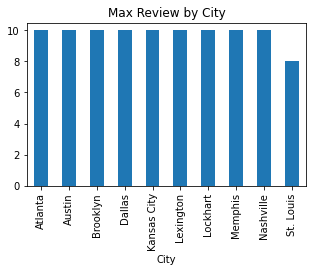

<Figure size 432x288 with 0 Axes>

In [18]:
#MatplotLib on max reviews-Andrea
city_max.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Max Review by City")

plt.show()
plt.tight_layout()

Max review is pretty standard accross all cities. St. Louis max is less based on the amount of reviews. 

In [19]:
#City with min reviews rating-Andrea
city_min = reviews_df.groupby("City")["Rating"].min()
city_min.head(10)

City
Atlanta        2.0
Austin         2.0
Brooklyn       8.0
Dallas         2.0
Kansas City    2.0
Lexington      2.0
Lockhart       4.0
Memphis        2.0
Nashville      2.0
St. Louis      8.0
Name: Rating, dtype: float64

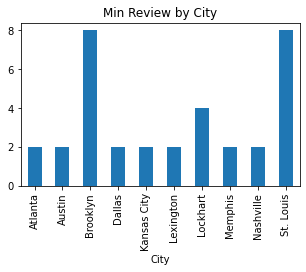

<Figure size 432x288 with 0 Axes>

In [20]:
#MatplotLib on min reviews-Andrea
city_min.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Min Review by City")

plt.show()
plt.tight_layout()

Brooklyn has the best BBQ in the 10 cities identified. 

In [21]:
#correlation on ranking and demographics


In [22]:
#MatplotLib correlation on ranking and demographics